## Final Project Submission

Please fill out:
* Student name: Charlie Losche
* Student pace: full time
* Scheduled project review date/time: 8/1/2022
* Instructor name: David Elliot
* Blog post URL:N/A


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [64]:
#import 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

In [3]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

# Exploratory Data Analysis (EDA)

Analyze and review the dataframe to better understand its makeup, the columns, datatypes, etc.

In [4]:
pd.set_option('display.max_colwidth', None) #allows us to see the full text of each object column, namely the "address" field
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,2022-05-24,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",47.461975,-122.19052
1,8910500230,2021-12-13,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",47.711525,-122.35591
2,1180000275,2021-09-29,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",47.502045,-122.22520
3,1604601802,2021-12-14,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",47.566110,-122.29020
4,8562780790,2021-08-24,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",47.532470,-122.07188


In [5]:
#Confirm the data types for each of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             30155 non-null  int64         
 1   date           30155 non-null  datetime64[ns]
 2   price          30155 non-null  float64       
 3   bedrooms       30155 non-null  int64         
 4   bathrooms      30155 non-null  float64       
 5   sqft_living    30155 non-null  int64         
 6   sqft_lot       30155 non-null  int64         
 7   floors         30155 non-null  float64       
 8   waterfront     30155 non-null  object        
 9   greenbelt      30155 non-null  object        
 10  nuisance       30155 non-null  object        
 11  view           30155 non-null  object        
 12  condition      30155 non-null  object        
 13  grade          30155 non-null  object        
 14  heat_source    30123 non-null  object        
 15  sewer_system   3014

In [6]:
#Look at the 'floors' value counts to determine why its a float
df['floors'].value_counts()

1.0    13962
2.0    12265
1.5     2439
3.0     1222
2.5      222
4.0       30
3.5       15
Name: floors, dtype: int64

In [7]:
#Identify the number of NAs / Nulls (blank)
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [8]:
df['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [9]:
df['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [10]:
df['sale_year'] = pd.DatetimeIndex(df['date']).year.astype(int)
df['sale_year'] = df['sale_year'].astype(np.int64)
print('sale years: \n', df.sale_year.value_counts())
print('build years: \n', df.yr_built.value_counts())
print('reno years: \n', df.yr_renovated.value_counts())

sale years: 
 2021    19293
2022    10862
Name: sale_year, dtype: int64
build years: 
 2021    1707
1968     516
2020     507
1978     493
1977     484
        ... 
1935      39
1901      39
1934      38
1902      36
1933      30
Name: yr_built, Length: 123, dtype: int64
reno years: 
 0       28783
2021       69
2006       49
2018       44
1990       42
        ...  
1924        1
1942        1
1972        1
1951        1
1930        1
Name: yr_renovated, Length: 83, dtype: int64


Based on the value counts above, the null values can either be kept as is or changed to "Unknown".

## Data Cleaning

### Linearity

In [11]:
df_num = df.select_dtypes(include=np.number)

df_num.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sale_year'],
      dtype='object')

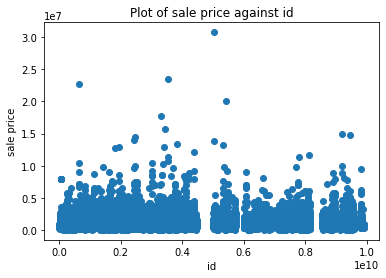

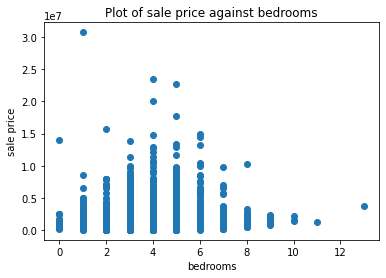

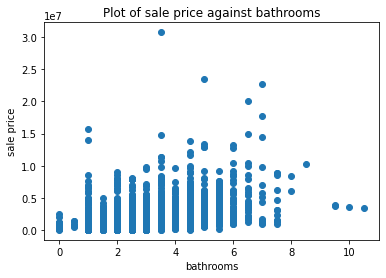

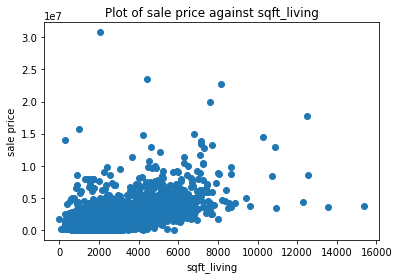

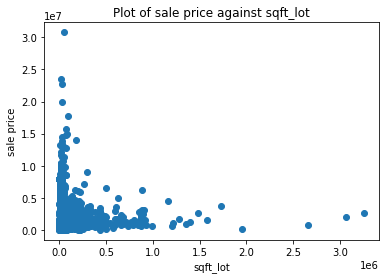

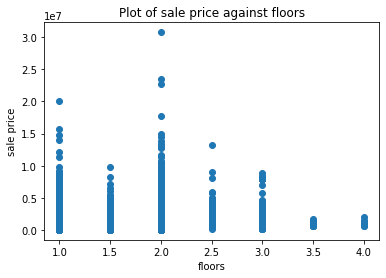

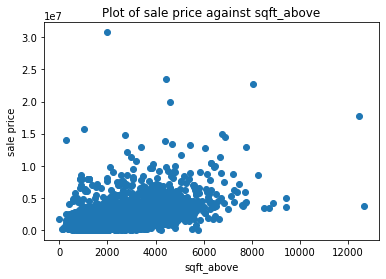

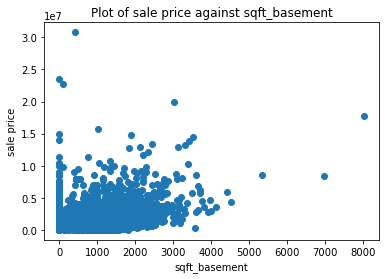

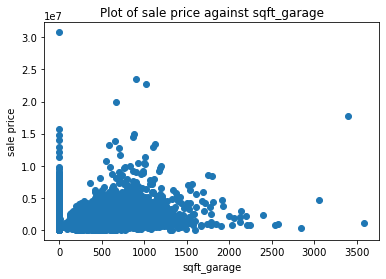

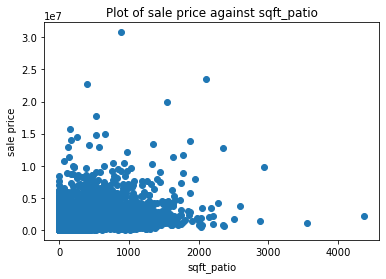

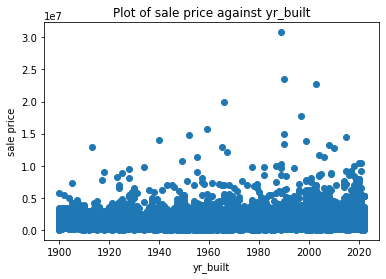

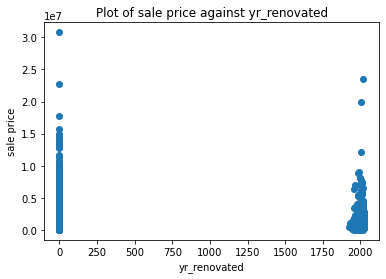

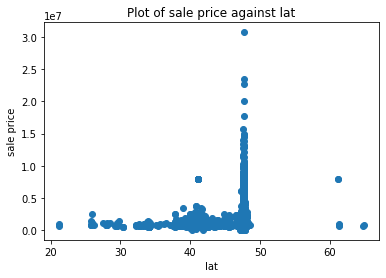

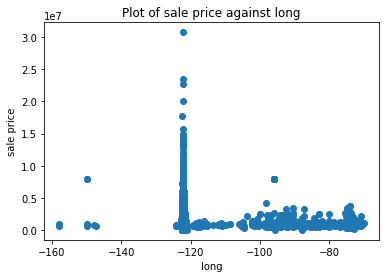

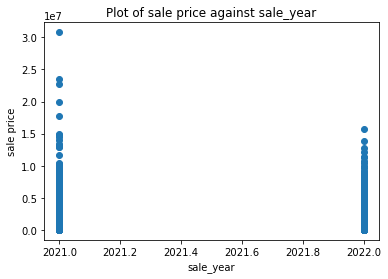

In [12]:
features = df_num.drop(columns='price').columns

for x in features:
    plt.scatter(df[x], df_num['price'])
    plt.title(f'Plot of sale price against {x}')
    plt.xlabel(x)
    plt.ylabel('sale price')
    plt.show()
    


# Nonlinear variables

Nonlinear variables include:
- sale year
- lat/long
- floors - categorical
- bathrooms - categorical
- bedrooms - categorical
- id

## collinearity

In [13]:
df_predictors = df.drop(columns=['price'])

<AxesSubplot:>

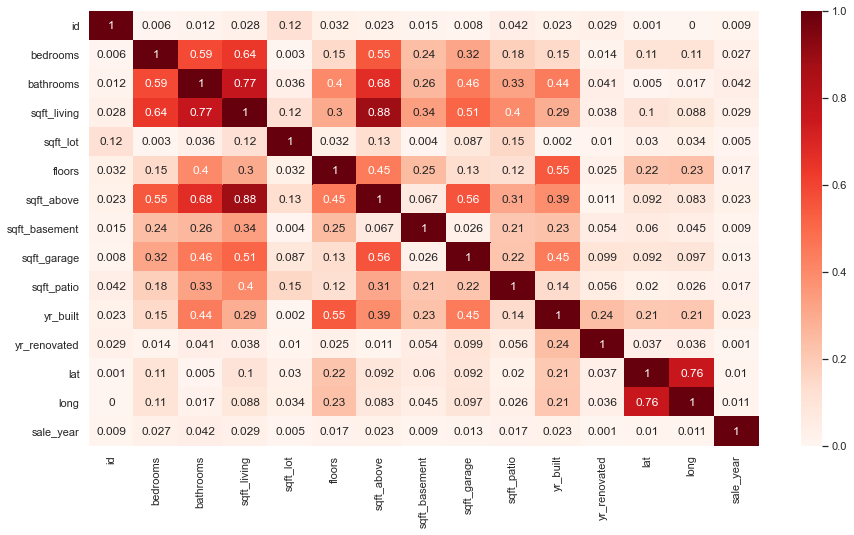

In [14]:
corr = round(abs(df_predictors.corr()),3)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap="Reds", annot=True)


It looks like there is high multicolinearity between:
- square footage against types of rooms and sqft of living
- sqft of different rooms against different types of rooms
- generally, anything inloving the space of the house/footage will have high colinearity

### VIF Scores/interpretations

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_num_pred = df_num.drop(columns='price')

# defining an empty dataframe to capture the VIF scores
vif = pd.DataFrame()

# For each column,run a variance_inflaction_factor against all other columns to get a VIF Factor score
vif["VIF"] = [variance_inflation_factor(df_num_pred.values, i) for i in range(len(df_num_pred.columns))]

# label the scores with their related columns
vif["features"] = df_num_pred.columns

vif

,VIF,features
0,3.539395,id
1,1.840332,bedrooms
2,3.284715,bathrooms
3,20.338576,sqft_living
4,1.068062,sqft_lot
5,2.011008,floors
6,17.228110,sqft_above
7,4.038710,sqft_basement
8,1.908084,sqft_garage
9,1.241089,sqft_patio


VIF Score Interpretation:

| Value | Correlation          |
|-------|----------------------|
| 1     | No correlation       |
| 1-5   | Moderate correlation |
| 5+    | High correlation     |

High (5+) correlation variables:

- sqf_living
- sqft_above
- sale_year

### Normality and Residuals

Quick Mutliple Regression to look at residuals

In [16]:
X = df_num_pred
y = df_num['price']

model = sm.OLS(y, sm.add_constant(X))

results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     1474.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:52:22   Log-Likelihood:            -4.4780e+05
No. Observations:               30155   AIC:                         8.956e+05
Df Residuals:                   30139   BIC:                         8.958e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.373e+08   1.65e+07    -20.398      0.000    -3.7e+08   -3.05e+08
id            -2.833e-06   1.37e-06     -2.064      0.039   -5.52e-06   -1.43e-07
bedrooms      -1.663e+05   5419.852    -30.679      0.000   -1.77e+05   -1.56e+05
bathrooms      1.413e+05   7991.043     17.680      0.000    1.26e+05    1.57e+05
sqft_living     335.1074     18.157     18.456      0.000     299.519     370.696
sqft_lot         -0.0931      0.067     -1.387      0.165      -0.225       0.038
floors        -8512.1431   9796.213     -0.869      0.385   -2.77e+04    1.07e+04
sqft_above      289.0114     18.533     15.595      0.000     252.687     325.336
sqft_basement   163.3963     13.597     12.017      0.000     136.746     190.046
sqft_garage    -146.7386     18.958     -7.740      0.000    -183.897    -109.580
sqft_patio      265.1725     17.810     14.889      0.000     230.264     300.081
yr_built      -3203.5825    185.558    -17.265      0.000   -3567.285   -2839.880
yr_renovated     50.5110      9.943      5.080      0.000      31.023      69.999
lat            3.169e+04   4251.342      7.454      0.000    2.34e+04       4e+04
long           1.173e+04   1068.974     10.972      0.000    9633.350    1.38e+04
sale_year        1.7e+05   8177.745     20.787      0.000    1.54e+05    1.86e+05
==============================================================================
Omnibus:                    43623.487   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         51640396.142
Skew:                           8.229   Prob(JB):                         0.00
Kurtosis:                     205.062   Cond. No.                     2.27e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
results.resid

0        308089.127914
1       -340268.280981
2       -687715.839841
3       -258853.936680
4         98024.434147
             ...      
30150    633970.782658
30151    278544.856685
30152     -5141.097736
30153   -576212.370911
30154    -47988.471348
Length: 30155, dtype: float64

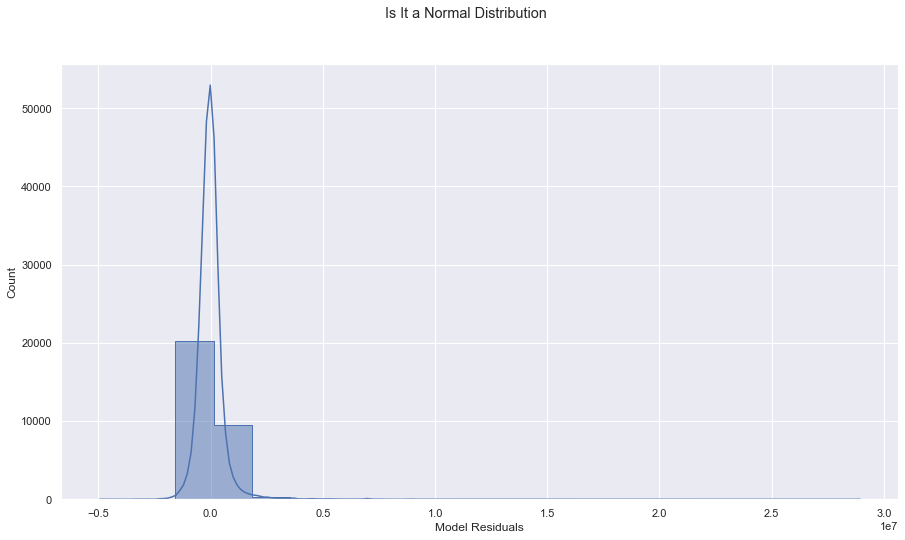

In [18]:
fig, ax = plt.subplots()
sns.histplot(results.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is It a Normal Distribution");

### Perfect QQ vs Our Multiple Regression QQ Plot

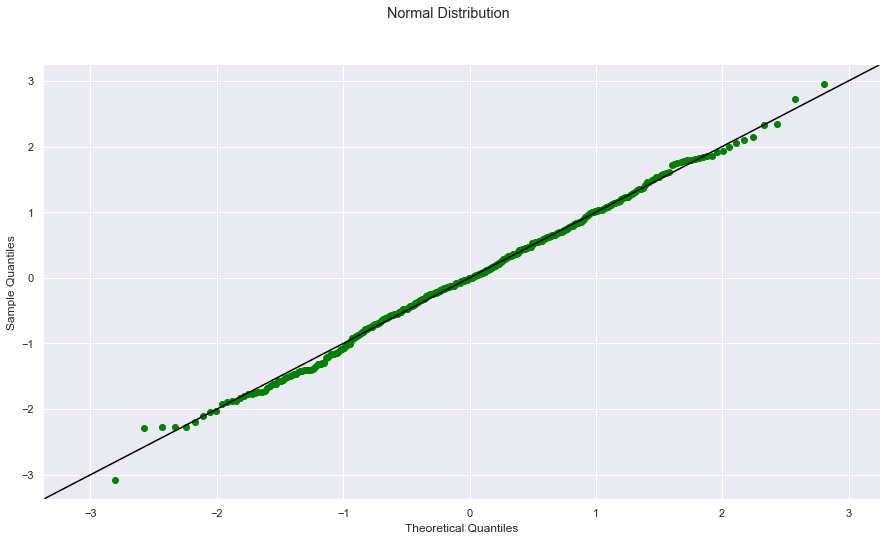

In [19]:
#Perfectly normal
generated_data = stats.norm.rvs(size=400, random_state=7)
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(generated_data, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution");

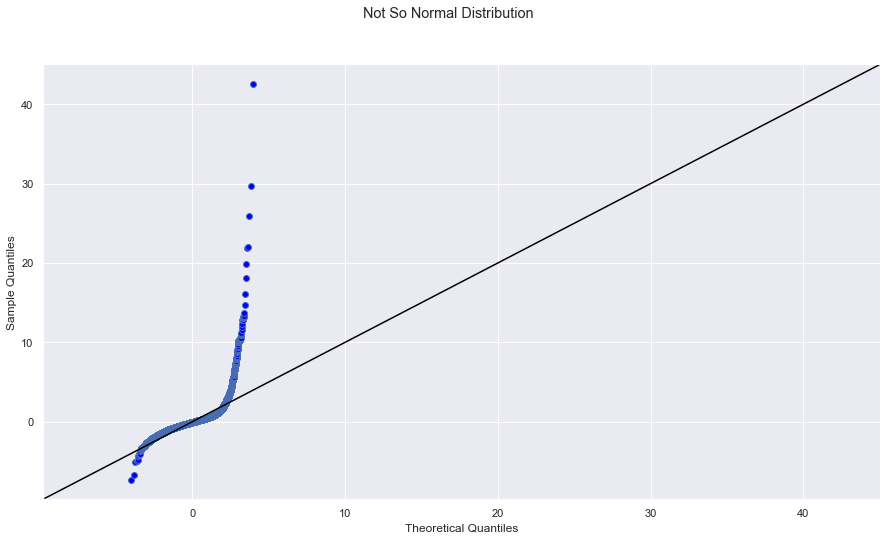

In [20]:
# Our distribution

# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Not So Normal Distribution");

### Heteroskedasticity

In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [22]:
het_breuschpagan(results.resid, sm.add_constant(X))

(596.6722573730785,
 1.808234082214936e-117,
 40.55959078955443,
 1.0633992158463925e-118)

The Breusch-Pagan Test P value is  1.0633992213478174e-118 - so we reject the null that the dataset is homoskedastic - the data is heteroskedastic

In [23]:
results.params

const           -3.373134e+08
id              -2.832541e-06
bedrooms        -1.662758e+05
bathrooms        1.412846e+05
sqft_living      3.351074e+02
sqft_lot        -9.311288e-02
floors          -8.512143e+03
sqft_above       2.890114e+02
sqft_basement    1.633963e+02
sqft_garage     -1.467386e+02
sqft_patio       2.651725e+02
yr_built        -3.203583e+03
yr_renovated     5.051105e+01
lat              3.168948e+04
long             1.172858e+04
sale_year        1.699921e+05
dtype: float64

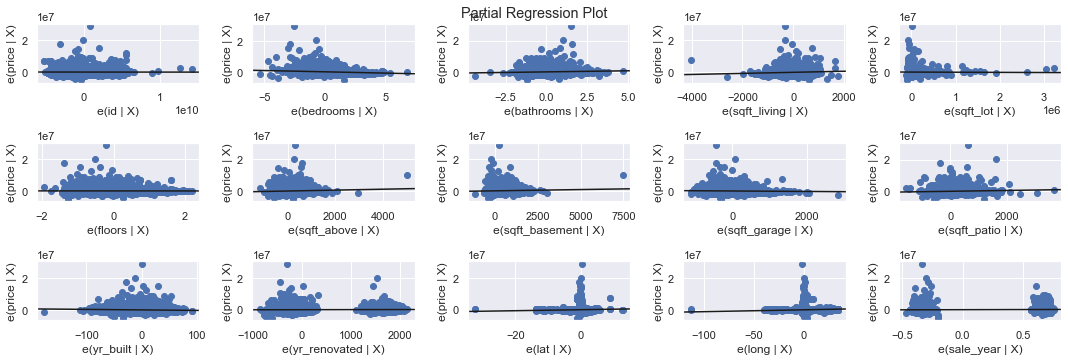

In [24]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns.values),
    grid=(5,5),
    fig=fig)
plt.show()

In [30]:
y_log = np.log(y)

# Data Cleaning - variables 9-13

my variables to turn into categorical

-  `waterfront` - BINARY
* `greenbelt` - BINARY
* `nuisance` - BINARY
* `view` - ORDINAL
* `condition` - ORDINAL



In [31]:
print(df.waterfront.value_counts(), ' \n')
print(df.greenbelt.value_counts(), ' \n')
print(df.nuisance.value_counts(), ' \n')
print(df.view.value_counts(), ' \n')
print(df.condition.value_counts(), ' \n')

NO     29636
YES      519
Name: waterfront, dtype: int64  

NO     29382
YES      773
Name: greenbelt, dtype: int64  

NO     24893
YES     5262
Name: nuisance, dtype: int64  

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64  

Average      18547
Good          8054
Very Good     3259
Fair           230
Poor            65
Name: condition, dtype: int64  



binary variables first

In [32]:
# (0) import OrdinalEncoder from sklearn.preprocessing
from sklearn.preprocessing import OrdinalEncoder

# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
greenbelt_cat = df[['greenbelt']]

# (2) Instantiate an OrdinalEncoder
encoder_greenbelt = OrdinalEncoder()

# (3) Fit the encoder on variable
encoder_greenbelt.fit(greenbelt_cat)

# Inspect the categories of the fitted encoder
encoder_greenbelt.categories_[0]

array(['NO', 'YES'], dtype=object)

No Greenbelt: 0
Yes Greenbelt: 1

In [33]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)

# Flatten for appropriate shape
greenbelt_encoded_train = greenbelt_encoded_train.flatten()

# Visually inspect variable
greenbelt_encoded_train

# (5) Replace value of greenbelt
df["greenbelt"] = greenbelt_encoded_train

# Visually inspect
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,greenbelt,nuisance,view,condition,sewer_system,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,basement_binary,garage_binary,patio_binary,waterfront_binary,zip
0,675000.0,4,1.0,1180,NO,0.0,NO,NONE,Good,PUBLIC,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",0,0,1,0,98055
1,920000.0,5,3.0,2770,NO,0.0,YES,AVERAGE,Average,PUBLIC,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",1,0,1,0,98133
2,311000.0,6,2.0,2880,NO,0.0,NO,AVERAGE,Average,PUBLIC,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",1,0,0,0,98178
3,775000.0,3,3.0,2160,NO,0.0,NO,AVERAGE,Average,PUBLIC,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",1,1,1,0,98118
4,592500.0,2,2.0,1120,NO,0.0,YES,NONE,Average,PUBLIC,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",1,1,1,0,98027


In [34]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
nuisance_cat = df[['nuisance']]

# (2) Instantiate an OrdinalEncoder
encoder_nuisance = OrdinalEncoder()

# (3) Fit the encoder on variable
encoder_nuisance.fit(nuisance_cat)

# Inspect the categories of the fitted encoder
encoder_nuisance.categories_[0]


array(['NO', 'YES'], dtype=object)

Nuisance NO: 0
Nuisance YES: 1

In [35]:

# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)

# Flatten for appropriate shape
nuisance_encoded_train = nuisance_encoded_train.flatten()

# (5) Replace value of greenbelt
df["nuisance"] = nuisance_encoded_train

# Visually inspect
df.nuisance.value_counts()

0.0    24893
1.0     5262
Name: nuisance, dtype: int64

Now for the ranked (ordinal) variables - view and condition

In [36]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
condition_cat = df[['condition']]

#set the condition categories
condition_categories = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
# (2) Instantiate an OrdinalEncoder
encoder_condition = OrdinalEncoder(categories=[condition_categories])

# (3) Fit the encoder on variable
encoder_condition.fit(condition_cat)

# Inspect the categories of the fitted encoder
encoder_condition.categories_[0]

array(['Poor', 'Fair', 'Average', 'Good', 'Very Good'], dtype=object)

- 'Poor': 0
- 'Fair': 1
- 'Average': 2
- 'Good': 3
- 'Very Good': 4

In [37]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
condition_encoded_train = encoder_condition.transform(condition_cat)

# Flatten for appropriate shape
condition_encoded_train = condition_encoded_train.flatten()

# (5) Replace value of greenbelt
df["condition"] = condition_encoded_train

# Visually inspect
df.condition.value_counts()

2.0    18547
3.0     8054
4.0     3259
1.0      230
0.0       65
Name: condition, dtype: int64

In [38]:
df.view.value_counts()

NONE         26589
AVERAGE       1915
GOOD           878
EXCELLENT      553
FAIR           220
Name: view, dtype: int64

In [39]:
# (1) Create a variable that contains the
# relevant column from df
# (Use double brackets [[]] to get the appropriate shape)
view_cat = df[['view']]

#set the condition categories
view_categories = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
# (2) Instantiate an OrdinalEncoder
encoder_view = OrdinalEncoder(categories=[view_categories])

# (3) Fit the encoder on variable
encoder_view.fit(view_cat)

# Inspect the categories of the fitted encoder
encoder_view.categories_[0]

array(['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT'], dtype=object)

- 'NONE': 0
- 'FAIR': 1
- 'AVERAGE': 2
- 'GOOD': 3
- 'EXCELLENT': 4

In [40]:
# Replace None with appropriate code

# (4) Transform variable using the encoder and
# assign the result to encoded variable
view_encoded_train = encoder_view.transform(view_cat)

# Flatten for appropriate shape
view_encoded_train = view_encoded_train.flatten()

# (5) Replace value of greenbelt
df["view"] = view_encoded_train

# Visually inspect
df.view.value_counts()

0.0    26589
2.0     1915
3.0      878
4.0      553
1.0      220
Name: view, dtype: int64

In [41]:
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,greenbelt,nuisance,view,condition,sewer_system,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,basement_binary,garage_binary,patio_binary,waterfront_binary,zip
0,675000.0,4,1.0,1180,NO,0.0,0.0,0.0,3.0,PUBLIC,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",0,0,1,0,98055
1,920000.0,5,3.0,2770,NO,0.0,1.0,2.0,2.0,PUBLIC,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",1,0,1,0,98133
2,311000.0,6,2.0,2880,NO,0.0,0.0,2.0,2.0,PUBLIC,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",1,0,0,0,98178
3,775000.0,3,3.0,2160,NO,0.0,0.0,2.0,2.0,PUBLIC,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",1,1,1,0,98118
4,592500.0,2,2.0,1120,NO,0.0,1.0,0.0,2.0,PUBLIC,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",1,1,1,0,98027


### Messing Around - weights of the variables

In [42]:
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())

In [43]:
results_standardized = sm.OLS(y, sm.add_constant(X_standard)).fit()

In [44]:
weights = results_standardized.params
weights

const            1.108536e+06
id              -8.165048e+03
bedrooms        -1.632184e+05
bathrooms        1.256806e+05
sqft_living      3.264095e+05
sqft_lot        -5.622398e+03
floors          -4.832488e+03
sqft_above       2.538405e+05
sqft_basement    9.470959e+04
sqft_garage     -4.193358e+04
sqft_patio       6.504756e+04
yr_built        -1.027304e+05
yr_renovated     2.103649e+04
lat              4.544287e+04
long             6.715172e+04
sale_year        8.160777e+04
dtype: float64

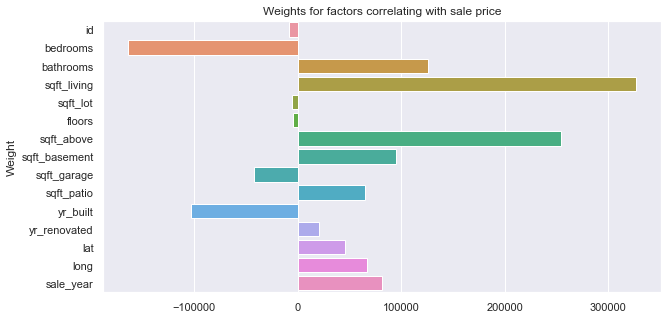

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with sale price")
plt.ylabel('Weight')
plt.show()

In [46]:
results_standardized.rsquared

0.42315156423625266

In [47]:
results.rsquared_adj

0.42286447022064433

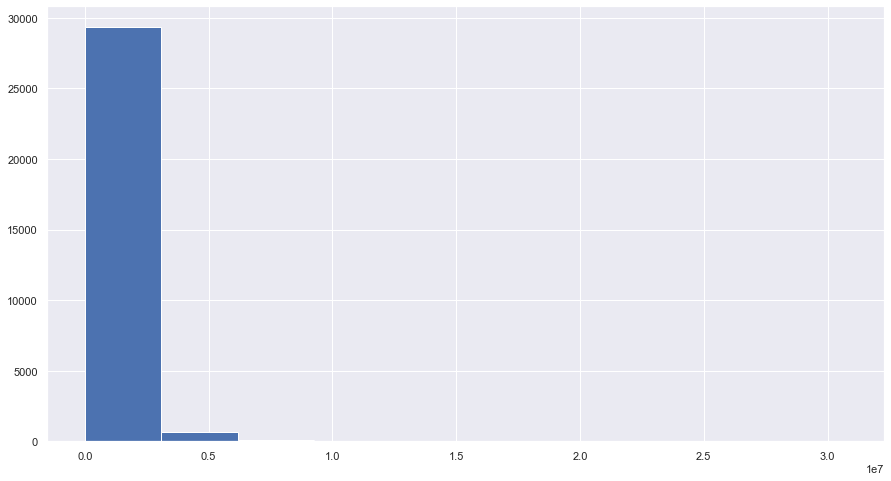

In [48]:
y.hist();

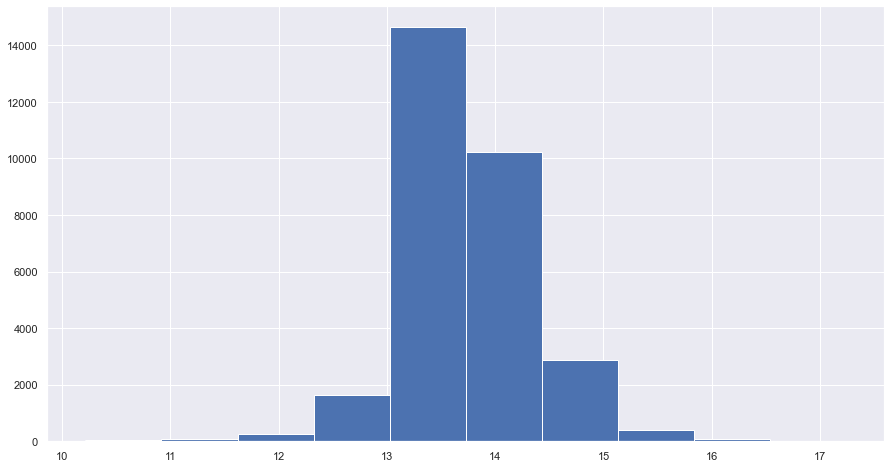

In [49]:
y_scld = np.log(y)
y_scld.hist();

In [50]:
model_diam = sm.OLS(y_scld, sm.add_constant(X_standard)).fit()
model_diam.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     1548.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        08:59:59   Log-Likelihood:                -17899.
No. Observations:               30155   AIC:                         3.583e+04
Df Residuals:                   30139   BIC:                         3.596e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.7348      0.003   5443.046      0.000      13.730      13.740
id               -0.0012      0.003     -0.453      0.651      -0.006       0.004
bedrooms         -0.0582      0.003    -16.992      0.000      -0.065      -0.051
bathrooms         0.0922      0.005     20.148      0.000       0.083       0.101
sqft_living       0.2102      0.011     18.470      0.000       0.188       0.233
sqft_lot          0.0033      0.003      1.262      0.207      -0.002       0.008
floors            0.0488      0.004     13.643      0.000       0.042       0.056
sqft_above        0.1066      0.010     10.175      0.000       0.086       0.127
sqft_basement     0.0576      0.005     11.361      0.000       0.048       0.068
sqft_garage      -0.0034      0.003     -0.964      0.335      -0.010       0.003
sqft_patio        0.0375      0.003     13.354      0.000       0.032       0.043
yr_built         -0.0788      0.004    -20.579      0.000      -0.086      -0.071
yr_renovated      0.0092      0.003      3.436      0.001       0.004       0.014
lat               0.0520      0.004     13.263      0.000       0.044       0.060
long              0.0558      0.004     14.157      0.000       0.048       0.063
sale_year         0.0663      0.003     26.233      0.000       0.061       0.071
==============================================================================
Omnibus:                     7307.192   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71203.469
Skew:                          -0.887   Prob(JB):                         0.00
Kurtosis:                      10.316   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

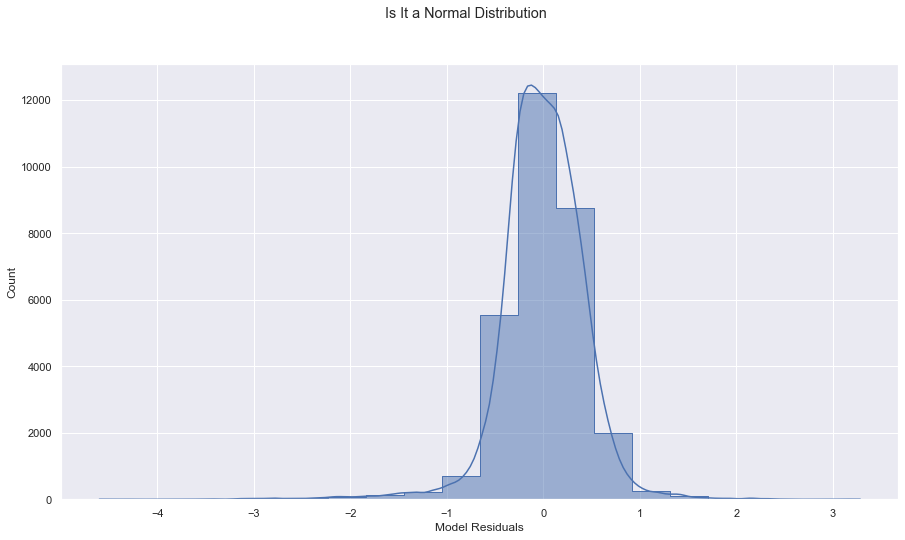

In [51]:
fig, ax = plt.subplots()
sns.histplot(model_diam.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is It a Normal Distribution");

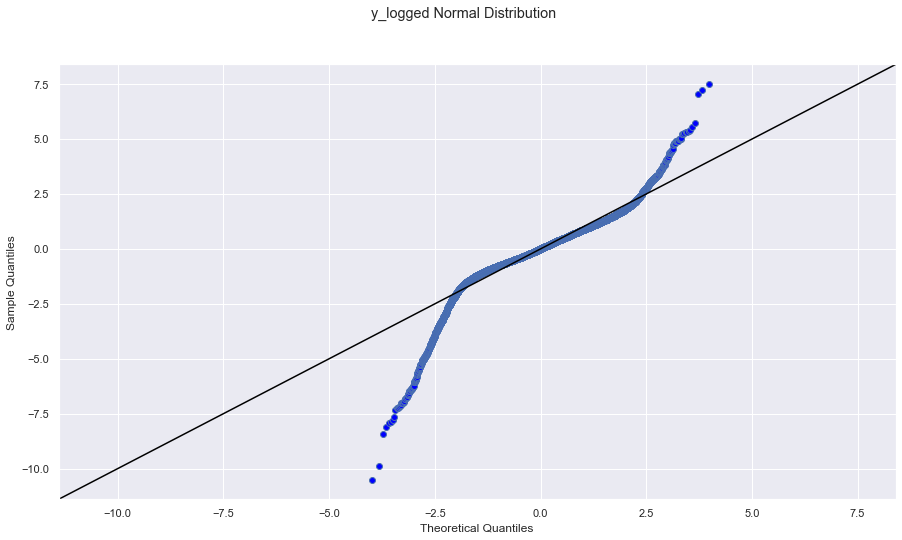

In [52]:
# Our distribution

# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(model_diam.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("y_logged Normal Distribution");

In [53]:
print(f"""
A one-unit increase in the depth variable corresponds
to an increase in price by a factor of {round(np.exp(0.2102), 3)},
or {round(np.exp(0.0319) - 1, 3)}%.
""")


A one-unit increase in the depth variable corresponds
to an increase in price by a factor of 1.234,
or 0.032%.



In [54]:
het_breuschpagan(model_diam.resid, sm.add_constant(X_standard))

(447.2990355304889,
 7.639365971154634e-86,
 30.252864171430197,
 1.6084809645109793e-86)

# Evaluating cleaned model

In [115]:
df = pd.read_csv('./data/kc_house_data.csv',
                parse_dates=['date'])

In [116]:
# Quasi-categorical(0.5 + 0.5 bathrooms != 1 bathroom). Change 0 bathroom to 1 bathroom. Round up other values.
df.loc[df['bathrooms'] == 0, 'bathrooms'] = 1
df['bathrooms'] = df['bathrooms'].apply(np.ceil)

# Drop unnecessary columns
df.drop(['id', 'date', 'sqft_lot', 'floors', 'grade',
         'heat_source','sqft_above','lat','long'], axis=1, inplace=True)

# Create binary substitutes for columns
df['basement_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_basement']]
df['garage_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_garage']]
df['patio_binary'] = [1 if sq >  0  else 0 for sq in df['sqft_patio']]
df['waterfront_binary'] = [1 if sq == 'YES'  else 0 for sq in df['waterfront']]
df['PublicSewer_binary'] = [1 if sq == 'PUBLIC' else 0 for sq in df['sewer_system']]
df['yrenovated_binary'] = [1 if sq >  0 else 0 for sq in df['yr_renovated']]

# Create zip from address
df['zip'] = [x.split(',')[2][-5:] for x in df['address']] 

# Create binary values for greenbelt, nuisance
# Using OneHotEncoder

greenbelt_cat = df[['greenbelt']]
encoder_greenbelt = OrdinalEncoder()
encoder_greenbelt.fit(greenbelt_cat)
encoder_greenbelt.categories_[0]
greenbelt_encoded_train = encoder_greenbelt.transform(greenbelt_cat)
greenbelt_encoded_train = greenbelt_encoded_train.flatten()
# greenbelt_encoded_train
df["greenbelt"] = greenbelt_encoded_train

nuisance_cat = df[['nuisance']]
encoder_nuisance = OrdinalEncoder()
encoder_nuisance.fit(nuisance_cat)
encoder_nuisance.categories_[0]
nuisance_encoded_train = encoder_nuisance.transform(nuisance_cat)
nuisance_encoded_train = nuisance_encoded_train.flatten()
df["nuisance"] = nuisance_encoded_train

# Create Ordinal Values for condition
# Using OneHotEncoder
condition_cat = df[['condition']]
condition_categories = ['Poor', 'Fair', 'Average', 'Good', 'Very Good']
encoder_condition = OrdinalEncoder(categories=[condition_categories])
encoder_condition.fit(condition_cat)
condition_encoded_train = encoder_condition.transform(condition_cat)
condition_encoded_train = condition_encoded_train.flatten()
df["condition"] = condition_encoded_train

# Create Ordinal Values for view
# Using OneHotEncoder
view_cat = df[['view']]
view_categories = ['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']
encoder_view = OrdinalEncoder(categories=[view_categories])
encoder_view.fit(view_cat)
encoder_view.categories_[0]
view_encoded_train = encoder_view.transform(view_cat)
view_encoded_train = view_encoded_train.flatten()
df["view"] = view_encoded_train

#https://www.zillow.com/browse/homes/wa/king-county/  - remove all records with zipcodes that dont start with '98'
df = df[df.zip.str.startswith(('98'))]

# (1) Create a variable zip
# extracted from df
# (double brackets due to shape expected by OHE)
fireplace_qu_train = df[["zip"]]

# (2) Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe = OneHotEncoder(categories="auto",
                    sparse=False,
                    handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(fireplace_qu_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['98001', '98002', '98003', '98004', '98005', '98006', '98007',
        '98008', '98010', '98011', '98014', '98019', '98022', '98023',
        '98024', '98027', '98028', '98029', '98030', '98031', '98032',
        '98033', '98034', '98038', '98039', '98040', '98042', '98045',
        '98047', '98050', '98051', '98052', '98053', '98055', '98056',
        '98057', '98058', '98059', '98065', '98070', '98072', '98074',
        '98075', '98077', '98092', '98102', '98103', '98105', '98106',
        '98107', '98108', '98109', '98112', '98115', '98116', '98117',
        '98118', '98119', '98122', '98125', '98126', '98133', '98136',
        '98144', '98146', '98148', '98155', '98166', '98168', '98177',
        '98178', '98188', '98198', '98199', '98223', '98224', '98251',
        '98270', '98271', '98272', '98288', '98296', '98338', '98354',
        '98372', '98387', '98422', '98663'], dtype=object)]

In [117]:
# Replace None with appropriate code

# (4) Transform fireplace_qu_train using the encoder and
# assign the result to fireplace_qu_encoded_train
fireplace_qu_encoded_train = ohe.transform(fireplace_qu_train)

# Visually inspect fireplace_qu_encoded_train
fireplace_qu_encoded_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
# Run this cell without changes

# (5a) Make the transformed data into a dataframe
fireplace_qu_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    fireplace_qu_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=df.index
)

# Visually inspect new dataframe
fireplace_qu_encoded_train

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98271,98272,98288,98296,98338,98354,98372,98387,98422,98663
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# Run this cell without changes

# (5b) Drop original FireplaceQu column
df.drop("zip", axis=1, inplace=True)

# Visually inspect X_train
df

,price,bedrooms,bathrooms,sqft_living,waterfront,greenbelt,nuisance,view,condition,sewer_system,...,sqft_patio,yr_built,yr_renovated,address,basement_binary,garage_binary,patio_binary,waterfront_binary,PublicSewer_binary,yrenovated_binary
0,675000.0,4,1.0,1180,NO,0.0,0.0,0.0,3.0,PUBLIC,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington 98055, United States",0,0,1,0,1,0
1,920000.0,5,3.0,2770,NO,0.0,1.0,2.0,2.0,PUBLIC,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washington 98133, United States",1,0,1,0,1,0
2,311000.0,6,2.0,2880,NO,0.0,0.0,2.0,2.0,PUBLIC,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 98178, United States",1,0,0,0,1,0
3,775000.0,3,3.0,2160,NO,0.0,0.0,2.0,2.0,PUBLIC,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington 98118, United States",1,1,1,0,1,0
4,592500.0,2,2.0,1120,NO,0.0,1.0,0.0,2.0,PUBLIC,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washington 98027, United States",1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,NO,0.0,0.0,0.0,3.0,PUBLIC,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington 98103, United States",1,0,1,0,1,0
30151,1313000.0,3,2.0,2020,NO,0.0,0.0,1.0,2.0,PUBLIC,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washington 98116, United States",0,0,1,0,1,0
30152,800000.0,3,2.0,1620,NO,0.0,1.0,0.0,2.0,PUBLIC,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washington 98122, United States",1,1,1,0,1,0
30153,775000.0,3,3.0,2570,NO,0.0,0.0,0.0,2.0,PUBLIC,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washington 98055, United States",1,1,1,0,1,0


In [120]:
# Run this cell without changes

# (5c) Concatenate the new dataframe with current X_train
df = pd.concat([df, fireplace_qu_encoded_train], axis=1)

# Visually inspect X_train
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,greenbelt,nuisance,view,condition,sewer_system,...,98271,98272,98288,98296,98338,98354,98372,98387,98422,98663
0,675000.0,4,1.0,1180,NO,0.0,0.0,0.0,3.0,PUBLIC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,920000.0,5,3.0,2770,NO,0.0,1.0,2.0,2.0,PUBLIC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,311000.0,6,2.0,2880,NO,0.0,0.0,2.0,2.0,PUBLIC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,775000.0,3,3.0,2160,NO,0.0,0.0,2.0,2.0,PUBLIC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,592500.0,2,2.0,1120,NO,0.0,1.0,0.0,2.0,PUBLIC,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
X = df.drop(columns=['price', 'sewer_system', 'waterfront','address','sqft_patio', 'sqft_basement', 'sqft_garage','bedrooms', 'bathrooms','PublicSewer_binary','garage_binary'])
y = df['price']

In [122]:
results_full = sm.OLS(y, sm.add_constant(X)).fit()

In [123]:
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     528.8
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:43:38   Log-Likelihood:            -4.2724e+05
No. Observations:               29237   AIC:                         8.547e+05
Df Residuals:                   29138   BIC:                         8.555e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -1.16e+05   2.63e+05     -0.441      0.659   -6.32e+05       4e+05
sqft_living         440.7949      4.026    109.490      0.000     432.904     448.686
greenbelt          5.472e+04   2.05e+04      2.670      0.008    1.45e+04    9.49e+04
nuisance            -4.9e+04   8640.518     -5.671      0.000   -6.59e+04   -3.21e+04
view                 1.2e+05   4372.222     27.448      0.000    1.11e+05    1.29e+05
condition          4.021e+04   4898.142      8.210      0.000    3.06e+04    4.98e+04
yr_built            123.7607    133.217      0.929      0.353    -137.351     384.872
yr_renovated       6353.1164    816.020      7.785      0.000    4753.681    7952.552
basement_binary   -1.196e+05   7446.944    -16.066      0.000   -1.34e+05   -1.05e+05
patio_binary      -2.596e+04   8017.214     -3.237      0.001   -4.17e+04   -1.02e+04
waterfront_binary  1.018e+06   2.71e+04     37.629      0.000    9.65e+05    1.07e+06
yrenovated_binary -1.262e+07   1.63e+06     -7.741      0.000   -1.58e+07   -9.43e+06
98001             -4.975e+05    2.7e+04    -18.426      0.000    -5.5e+05   -4.45e+05
98002             -4.202e+05   3.24e+04    -12.950      0.000   -4.84e+05   -3.57e+05
98003              -4.51e+05   3.02e+04    -14.923      0.000    -5.1e+05   -3.92e+05
98004              1.923e+06   3.41e+04     56.312      0.000    1.86e+06    1.99e+06
98005              7.155e+05    4.3e+04     16.635      0.000    6.31e+05       8e+05
98006              3.617e+05   2.87e+04     12.615      0.000    3.06e+05    4.18e+05
98007               2.78e+05   4.59e+04      6.059      0.000    1.88e+05    3.68e+05
98008              3.192e+05   3.13e+04     10.193      0.000    2.58e+05    3.81e+05
98010             -5.914e+05   3.46e+04    -17.083      0.000   -6.59e+05   -5.24e+05
98011             -1.252e+04   3.68e+04     -0.341      0.733   -8.46e+04    5.95e+04
98014             -2.927e+05   4.55e+04     -6.434      0.000   -3.82e+05   -2.04e+05
98019             -2.322e+05   3.79e+04     -6.129      0.000   -3.06e+05   -1.58e+05
98022             -4.927e+05   2.99e+04    -16.463      0.000   -5.51e+05   -4.34e+05
98023             -5.023e+05   2.61e+04    -19.244      0.000   -5.53e+05   -4.51e+05
98024              1.395e+05   5.26e+04      2.654      0.008    3.65e+04    2.43e+05
98027              3.983e+04    3.2e+04      1.245      0.213   -2.29e+04    1.03e+05
98028             -9.512e+04   3.29e+04     -2.894      0.004    -1.6e+05   -3.07e+04
98029              2.317e+05   3.42e+04      6.769      0.000    1.65e+05    2.99e+05
98030             -4.603e+05   3.21e+04    -14.336      0.000   -5.23e+05   -3.97e+05
98031             -4.224e+05   2.85e+04    -14.844      0.000   -4.78e+05   -3.67e+05
98032             -4.106e+05   4.25e+04     -9.660      0.000   -4.94e+05

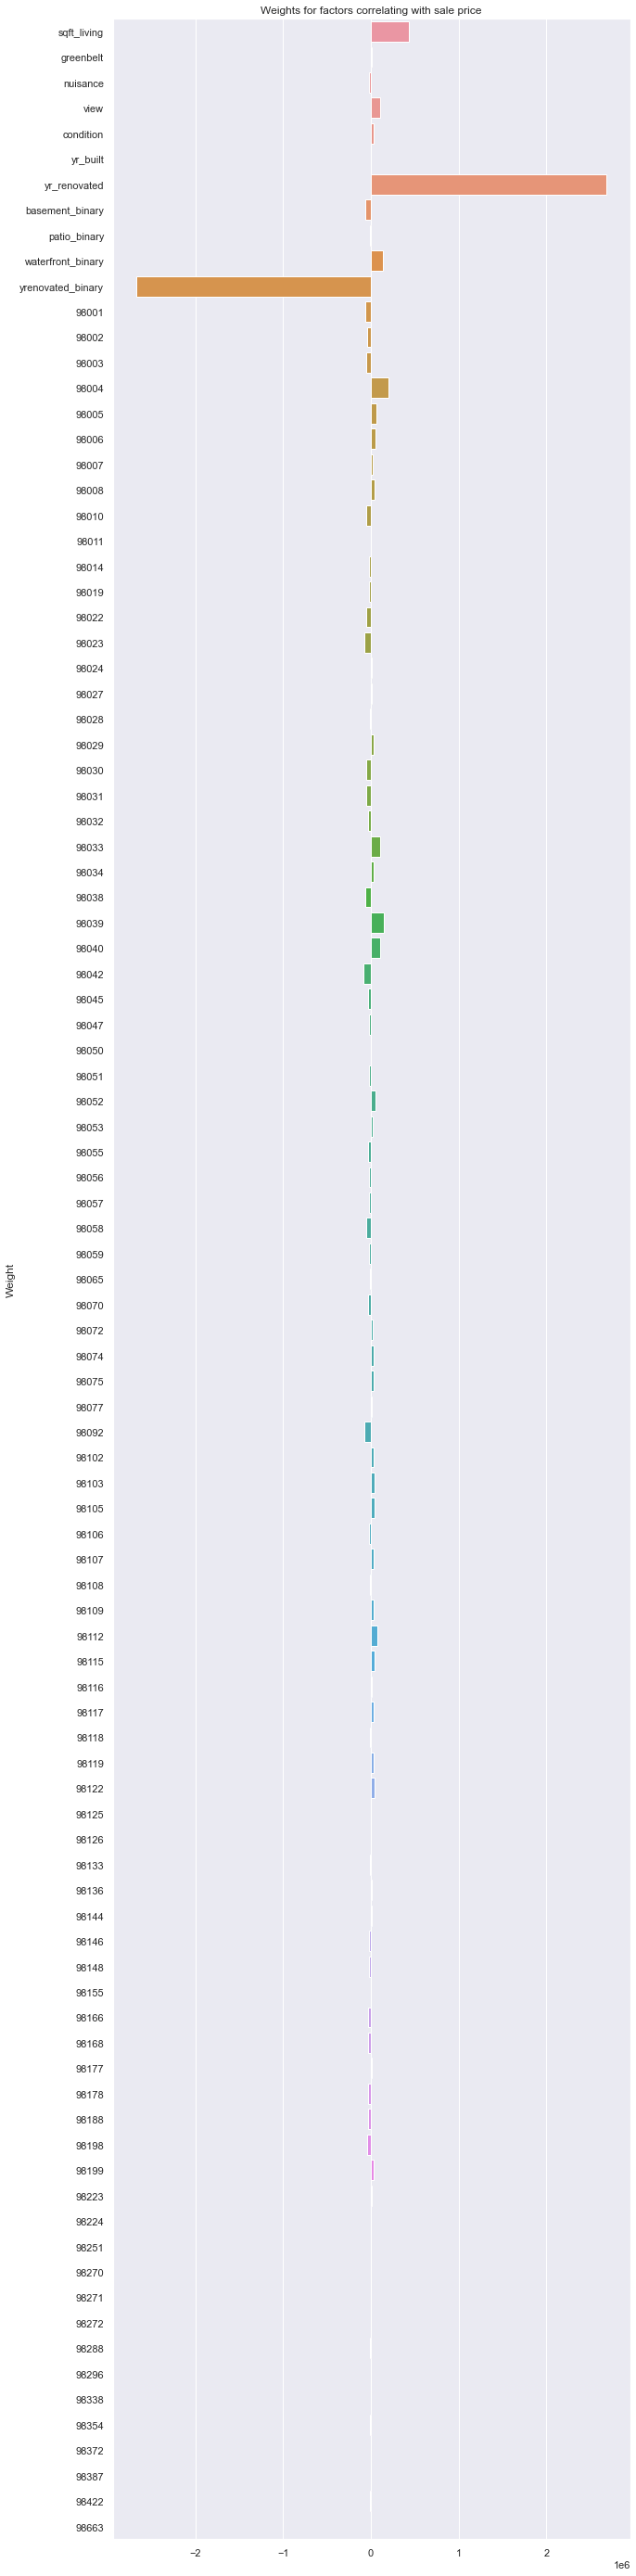

In [124]:
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())

results_standardized = sm.OLS(y, sm.add_constant(X_standard)).fit()

weights = results_standardized.params
weights

plt.figure(figsize=(10,50))
sns.barplot(y = weights[1::].index, x = weights[1::].values)
plt.title("Weights for factors correlating with sale price")
plt.ylabel('Weight')
plt.show()

<AxesSubplot:>

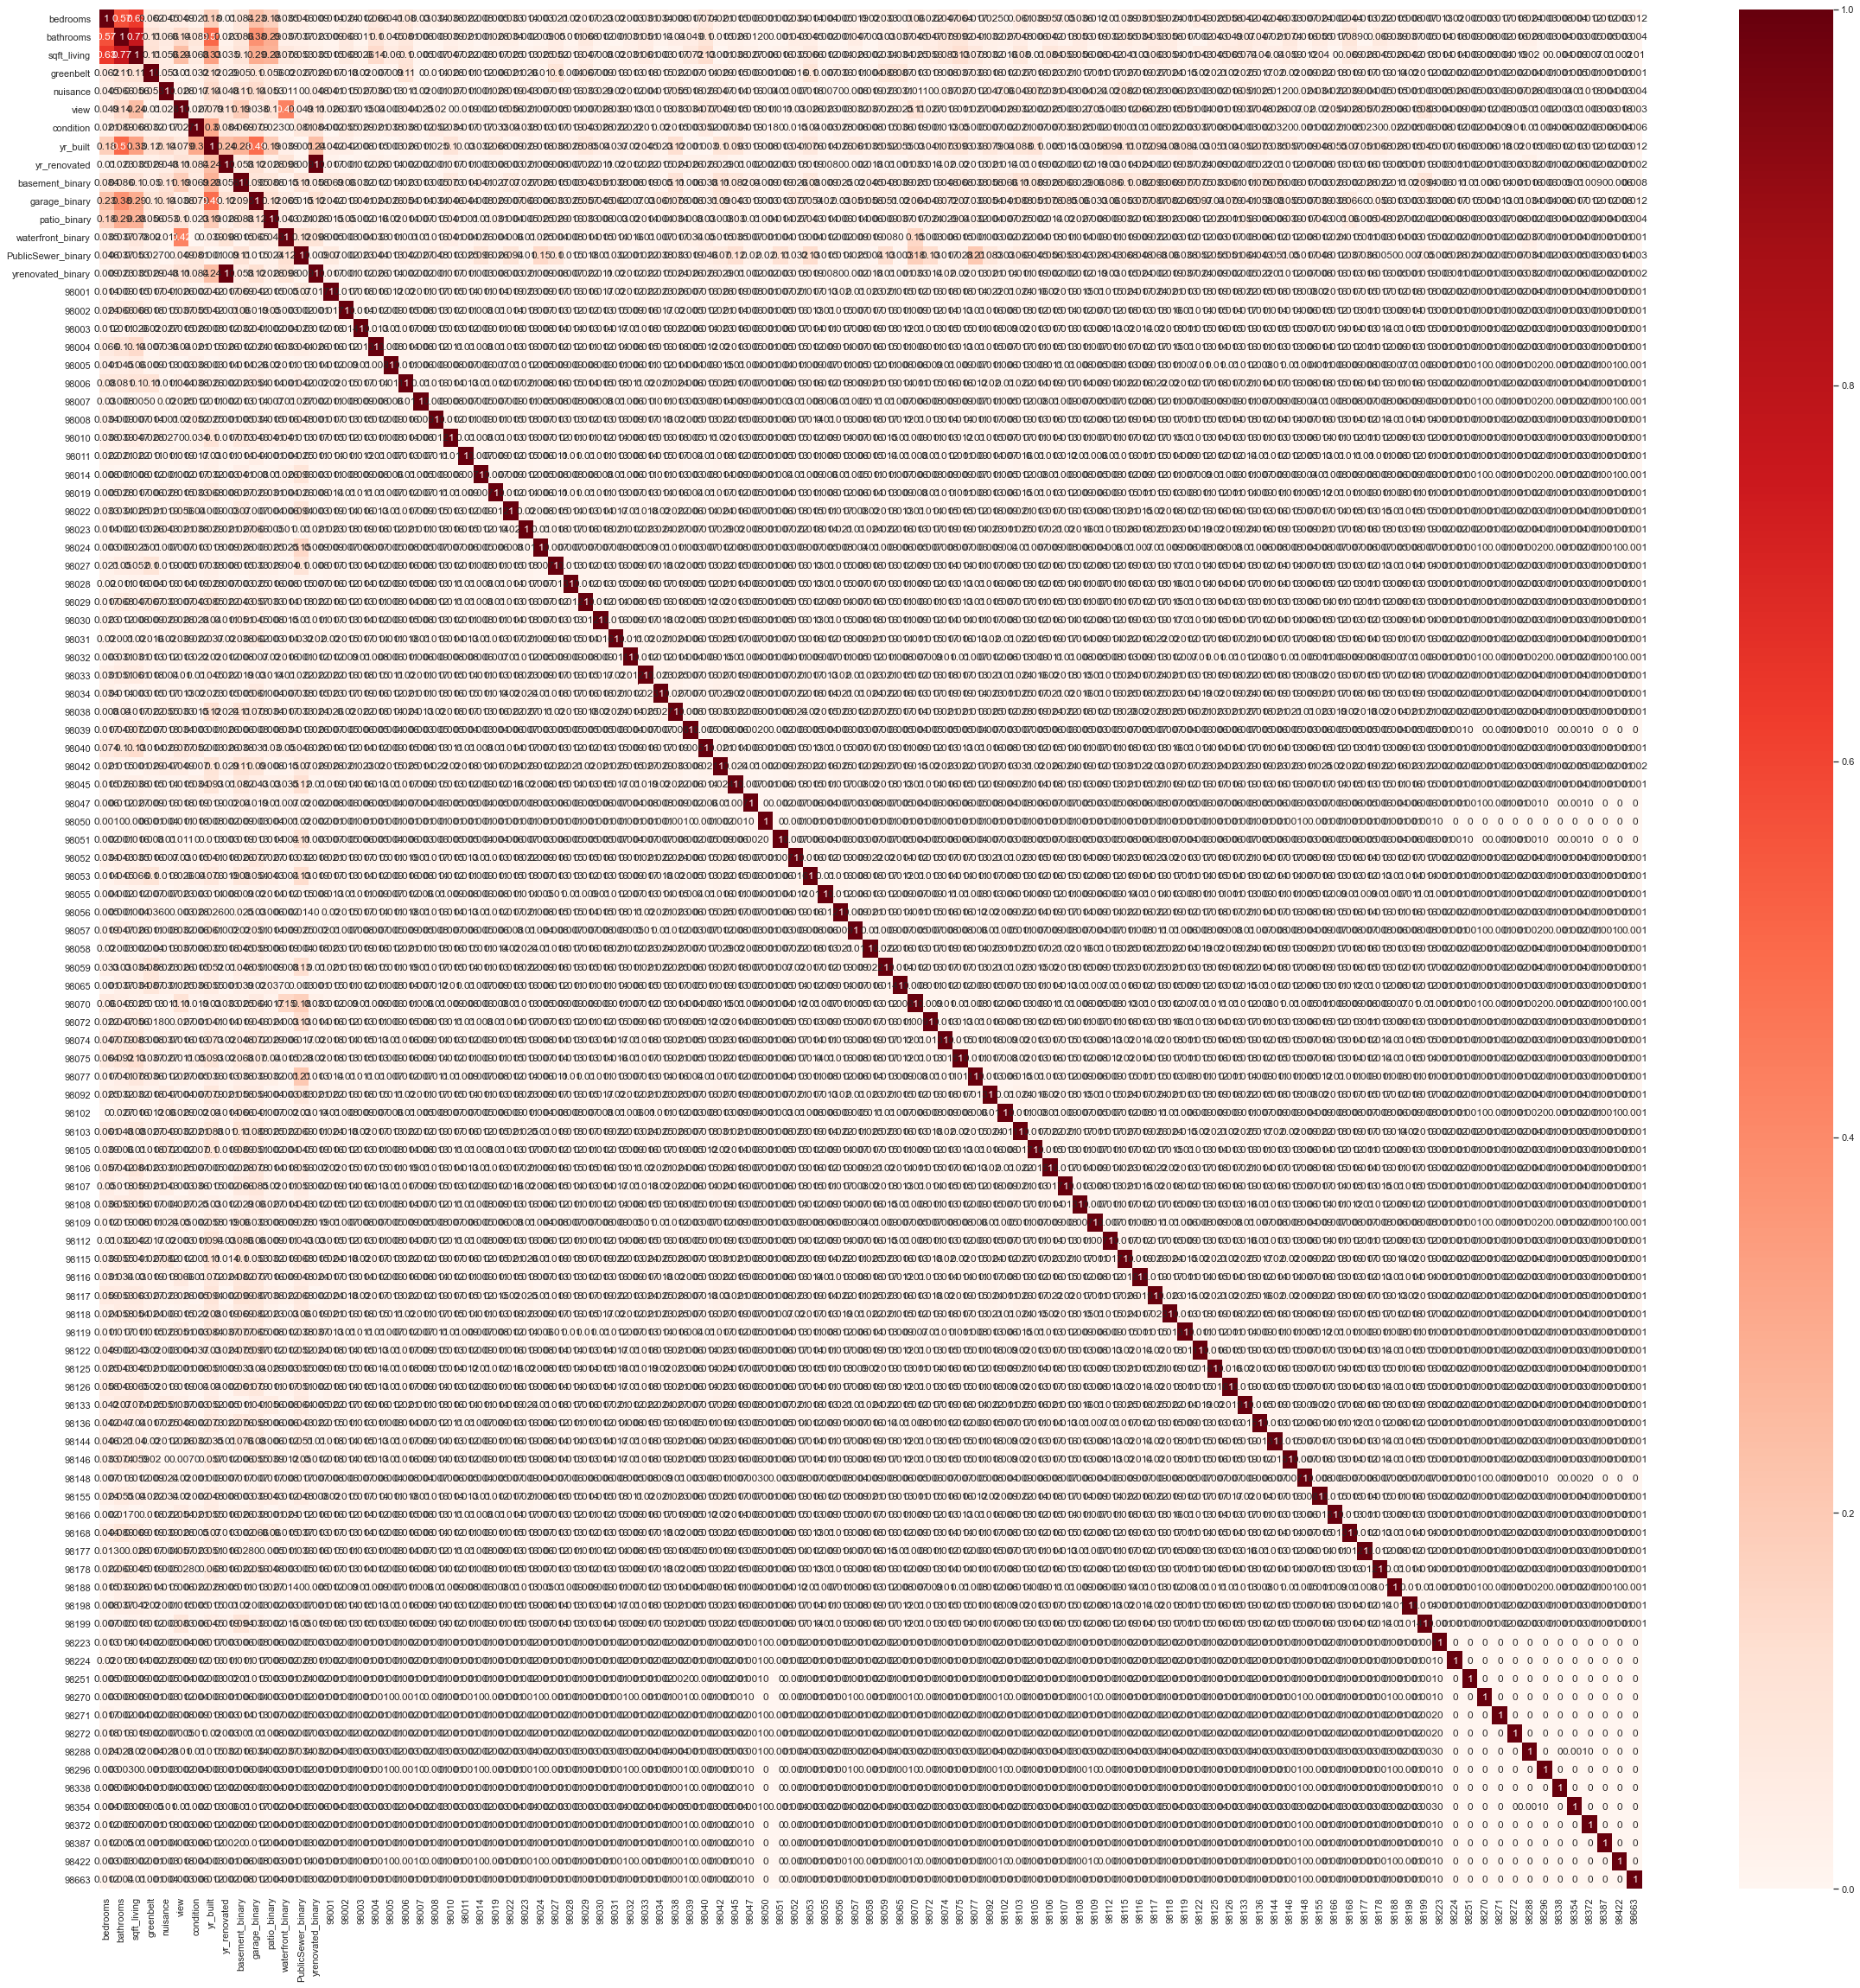

In [105]:
corr = round(abs(X.corr()),3)
sns.set(rc = {'figure.figsize':(40,40)})
sns.heatmap(corr, cmap="Reds", annot=True);


In [130]:
X_test = df.drop(columns=['sewer_system', 'waterfront','address','sqft_patio', 'sqft_basement', 'sqft_garage','bedrooms', 'bathrooms','PublicSewer_binary','garage_binary'])
X_test.corr()['price'].map(abs).sort_values(ascending=False)

price                1.000000
sqft_living          0.616664
view                 0.320877
98004                0.305704
waterfront_binary    0.236780
                       ...   
98272                0.003046
98296                0.002695
98372                0.001895
98116                0.001625
98271                0.000173
Name: price, Length: 100, dtype: float64

In [131]:
X = df[['sqft_living', 'view', 'waterfront_binary', 'yr_renovated', 'greenbelt', 'condition']]
y = df['price']

In [132]:
results_test = sm.OLS(y, sm.add_constant(X)).fit()

results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     3677.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:54:27   Log-Likelihood:            -4.3396e+05
No. Observations:               29237   AIC:                         8.679e+05
Df Residuals:                   29230   BIC:                         8.680e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.637e+05   1.75e+04     -9.363      0.000   -1.98e+05   -1.29e+05
sqft_living         528.4180      4.211    125.497      0.000     520.165     536.671
view                1.23e+05   5221.380     23.554      0.000    1.13e+05    1.33e+05
waterfront_binary  9.347e+05   3.32e+04     28.117      0.000     8.7e+05       1e+06
yr_renovated         87.8777      9.467      9.283      0.000      69.323     106.433
greenbelt          5.159e+04   2.49e+04      2.073      0.038    2808.147       1e+05
condition          3.505e+04   5624.677      6.232      0.000     2.4e+04    4.61e+04
==============================================================================
Omnibus:                    40454.874   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44271670.607
Skew:                           7.522   Prob(JB):                         0.00
Kurtosis:                     193.040   Cond. No.                     1.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
X = df[['sqft_living', 'view', 'waterfront_binary', 'yr_renovated', 'greenbelt', 'condition']]
X_standard = X.apply(lambda x: (x-x.mean())/ x.std())
y = df['price']

results_test = sm.OLS(y, sm.add_constant(X_standard)).fit()

results_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     3677.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:57:45   Log-Likelihood:            -4.3396e+05
No. Observations:               29237   AIC:                         8.679e+05
Df Residuals:                   29230   BIC:                         8.680e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.113e+06   3953.578    281.420      0.000     1.1e+06    1.12e+06
sqft_living        5.165e+05   4115.294    125.497      0.000    5.08e+05    5.25e+05
view               1.062e+05   4506.753     23.554      0.000    9.73e+04    1.15e+05
waterfront_binary  1.231e+05   4377.287     28.117      0.000    1.14e+05    1.32e+05
yr_renovated       3.714e+04   4001.007      9.283      0.000    2.93e+04     4.5e+04
greenbelt          8262.2450   3985.907      2.073      0.038     449.687    1.61e+04
condition          2.482e+04   3983.434      6.232      0.000     1.7e+04    3.26e+04
==============================================================================
Omnibus:                    40454.874   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         44271670.607
Skew:                           7.522   Prob(JB):                         0.00
Kurtosis:                     193.040   Cond. No.                         1.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""